In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from numpy import cov

In [12]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [13]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [14]:
# https://drive.google.com/file/d/1YcaHs9o9stIT_2MTqT2So0LP4Lhg_TBR/view?usp=sharing
filedown = drive.CreateFile({'id':'1YcaHs9o9stIT_2MTqT2So0LP4Lhg_TBR'})

In [15]:
filedown.GetContentFile('fetal_health.csv')

In [16]:
df = pd.read_csv('fetal_health.csv')


## Exploratory Analysis

In [17]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [18]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Text(0.5, 1.0, 'Fetal Health Frequency Histogram')

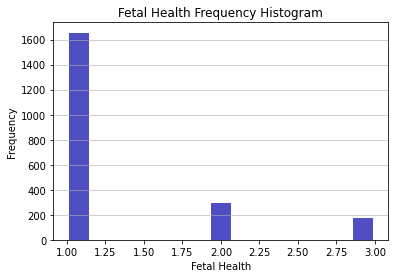

In [19]:
hist = plt.hist(x=df['fetal_health'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fetal Health')
plt.ylabel('Frequency')
plt.title('Fetal Health Frequency Histogram')


## Fetal Health and Fetal Movement

In [20]:
cova = cov(df['fetal_movement'], df['fetal_health'])
print(cova)

[[0.0021777  0.00252328]
 [0.00252328 0.37745891]]


In [35]:
x = df['fetal_movement']
y = df['fetal_health']

In [36]:
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

### Regression

In [40]:
model = LinearRegression().fit(x, y)

In [42]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.007745762042250526


In [57]:
from scipy import stats
statistic, p_value = stats.ttest_rel(df.fetal_movement,df.fetal_health)
print('p-value: ',p_value)

p-value:  0.0


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [43]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) 

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(x_train, np.ravel(y_train,order='C'))
random_forest_prediction = random_forest_classifier.predict(x_test)

accuracy = accuracy_score(y_test, random_forest_prediction)

In [67]:
accuracy

0.7931034482758621

### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, np.ravel(y_train,order='C')) 

y_predict_knn = classifier.predict(x_test)

print(confusion_matrix(y_test, y_predict_knn))
print(classification_report(y_test, y_predict_knn)) 

[[498   2   1]
 [ 80   3   3]
 [ 45   1   5]]
              precision    recall  f1-score   support

         1.0       0.80      0.99      0.89       501
         2.0       0.50      0.03      0.07        86
         3.0       0.56      0.10      0.17        51

    accuracy                           0.79       638
   macro avg       0.62      0.38      0.37       638
weighted avg       0.74      0.79      0.72       638



In [48]:
accuracyknn = accuracy_score(y_test, y_predict_knn)
accuracyknn

0.7931034482758621

### Decision Tree

In [47]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(criterion='gini')

decision_tree.fit(x_train, y_train)

y_predict_dt = decision_tree.predict(x_test)

print(confusion_matrix(y_test, y_predict_dt))
print(classification_report(y_test, y_predict_dt))

[[498   2   1]
 [ 80   3   3]
 [ 45   1   5]]
              precision    recall  f1-score   support

         1.0       0.80      0.99      0.89       501
         2.0       0.50      0.03      0.07        86
         3.0       0.56      0.10      0.17        51

    accuracy                           0.79       638
   macro avg       0.62      0.38      0.37       638
weighted avg       0.74      0.79      0.72       638



In [50]:
accuracy = accuracy_score(y_test, y_predict_dt)
accuracy

0.7931034482758621

## Fetal Health and Uterine Contractions

In [59]:
cova = cov(df['uterine_contractions'], df['fetal_health'])
print(cova)

[[ 8.67932334e-06 -3.70856953e-04]
 [-3.70856953e-04  3.77458912e-01]]


In [51]:
x1 = df['uterine_contractions']
y1 = df['fetal_health']

In [52]:
x1 = x1.values.reshape(-1, 1)
y1 = y1.values.reshape(-1, 1)

### Regression

In [56]:
model = LinearRegression().fit(x1, y1)

r_sq = model.score(x1, y1)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.041981437019912526


In [58]:
from scipy import stats
statistic, p_value = stats.ttest_rel(df.uterine_contractions,df.fetal_health)
print('p-value: ',p_value)

p-value:  0.0


In [53]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(x1_train)

x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)

### KNN

In [69]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x1_train, np.ravel(y1_train,order='C')) 

y1_predict_knn = classifier.predict(x1_test)

print(confusion_matrix(y1_test, y1_predict_knn))
print(classification_report(y1_test, y1_predict_knn, zero_division=1)) 

[[501   0   0]
 [ 86   0   0]
 [ 51   0   0]]
              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88       501
         2.0       1.00      0.00      0.00        86
         3.0       1.00      0.00      0.00        51

    accuracy                           0.79       638
   macro avg       0.93      0.33      0.29       638
weighted avg       0.83      0.79      0.69       638



In [70]:
accuracy = accuracy_score(y1_test, y1_predict_knn)
accuracy

0.7852664576802508